In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
with open('data/titanic.pkl','rb') as f:
  data = joblib.load(f)
locals().update(data)
del data, dt

In [3]:
np.random.seed(1234)
y = titanic.Survived
x = titanic.drop(columns='Survived')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred_dt01 = dt.predict(x_test)
pred_dt02 = dt.predict_proba(x_test)[:,1]
print(accuracy_score(y_test, pred_dt01))
print(roc_auc_score(y_test, pred_dt02))

0.7985074626865671
0.7949740137018664


In [17]:
dt.feature_importances_

array([0.0901193 , 0.28335265, 0.24536028, 0.04611047, 0.02100009,
       0.24268272, 0.05327799, 0.01809649])

In [18]:
fe = pd.DataFrame({'변수명':x.columns, '변수중요도':dt.feature_importances_})
fe = fe.sort_values('변수중요도', ascending=False).reset_index(drop=True)
fe

,변수명,변수중요도
0,Sex,0.283353
1,Age,0.245360
2,Fare,0.242683
3,Pclass,0.090119
4,Cabin,0.053278
5,SibSp,0.046110
6,Parch,0.021000
7,Embarked,0.018096


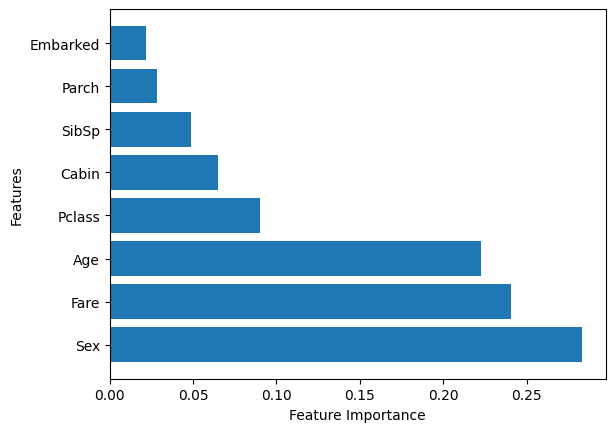

In [13]:
plt.barh(fe.변수명, fe.변수중요도, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features');

In [10]:
!pip3 install pydot

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# conda install pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

dot_data = export_graphviz(dt, out_file=None, filled=True, feature_names=x.columns,
                           class_names=["0","1"])

(graph,) = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)
pred_dt01 = dt.predict(x_test)
pred_dt02 = dt.predict_proba(x_test)[:,1]
print(accuracy_score(y_test, pred_dt01))
print(roc_auc_score(y_test, pred_dt02))

0.8134328358208955
0.8578726671391448


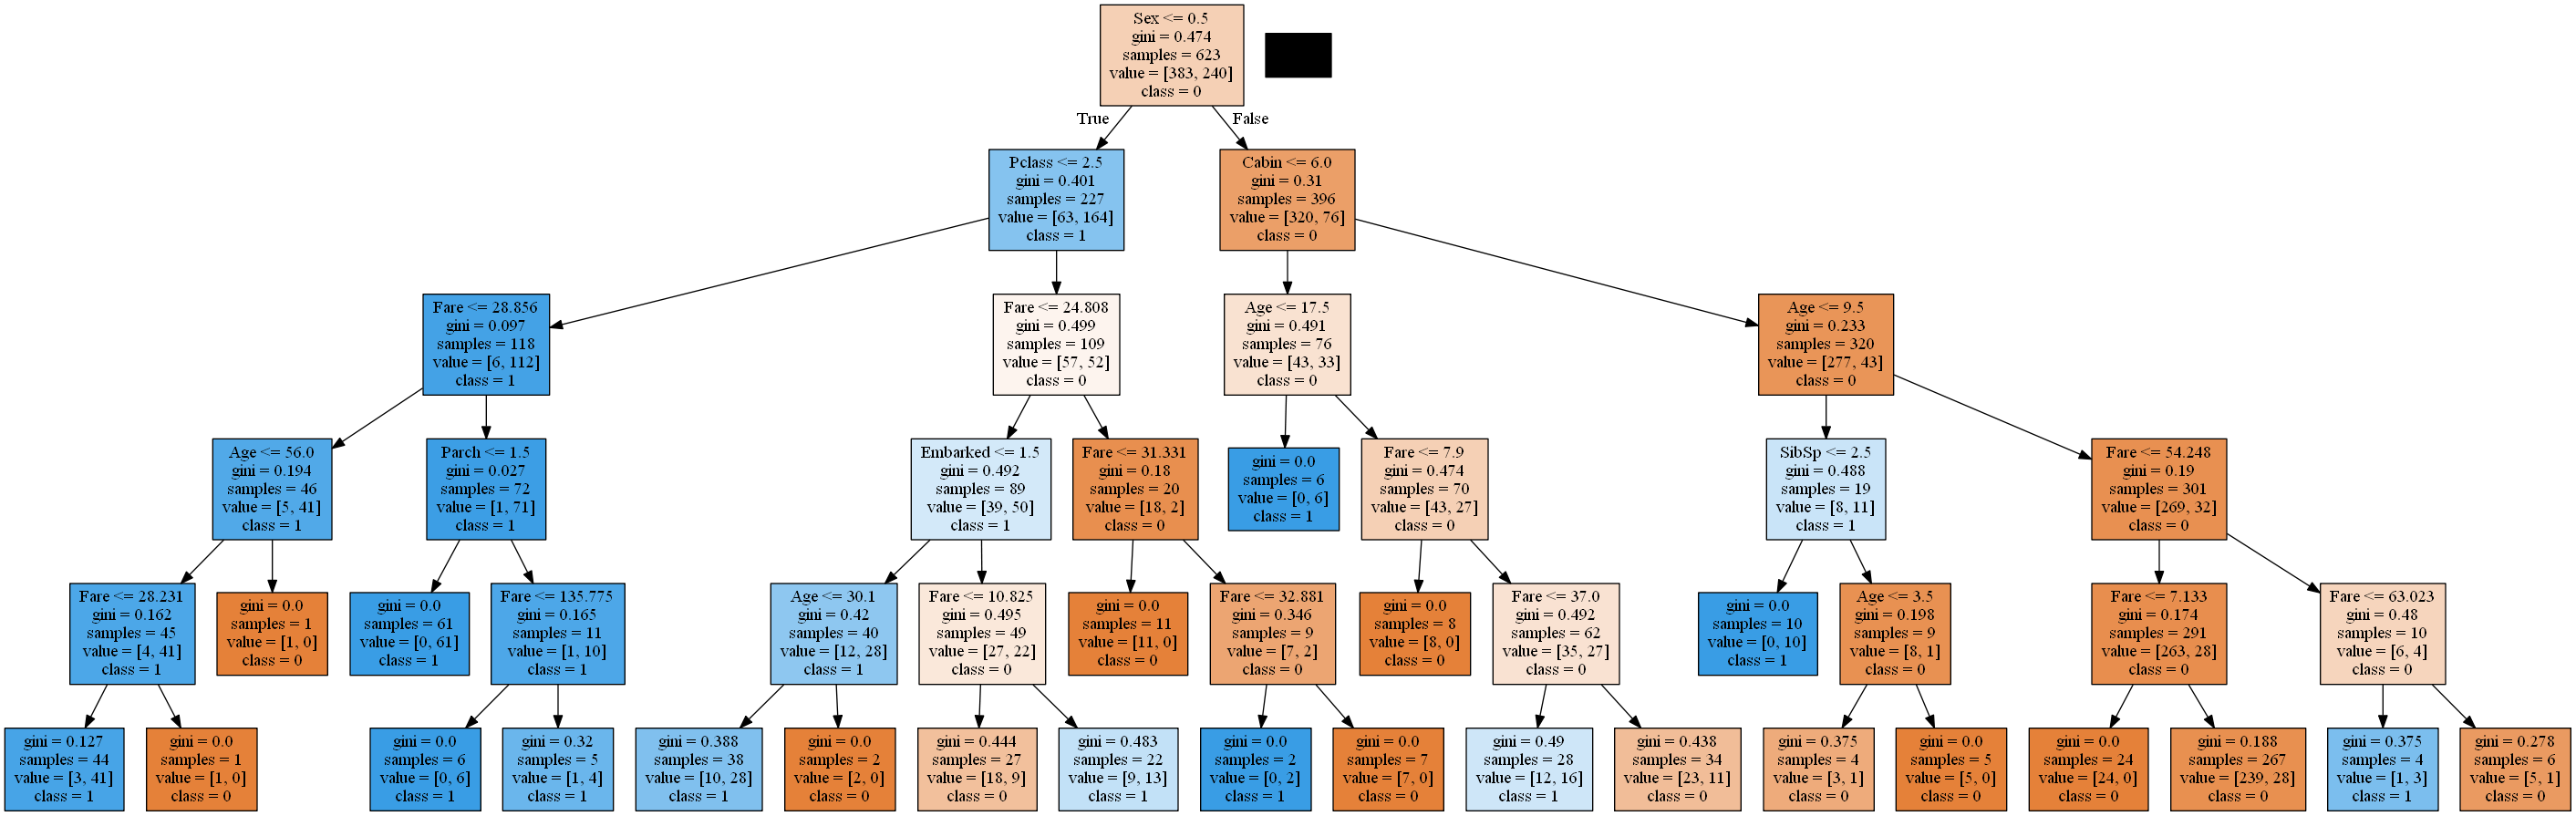

In [ ]:
dot_data = export_graphviz(dt, out_file=None, filled=True, feature_names=x.columns,
                           class_names=["0","1"])

(graph,) = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())